In [1]:
%matplotlib inline
from stack_nlp import *
from jupyter_mplsettings import *
matplotlib.rc('font', **font)

In [2]:
cfg = local_import("./default.py")

In [3]:
PrepareData(cfg)
data = cfg.data
data.keys()
qs = data["meta"];

Shape of question df (1696819, 21)
Shape of answer df (2028240, 21)
Loading word dictionary...
Warning! Dropping some words from word list, please verify!
Calculating normalized columns. They are available under usual column name + _norm.


In [ ]:
qs.Tags

In [20]:
qs.Score.describe()
qs = qs[np.isfinite(qs.dt_accanswer_hour)]

In [28]:
qs.FavoriteCount.describe()

count    307514.000000
mean         -0.659785
std           1.199670
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max          58.000000
Name: FavoriteCount, dtype: float64

(0, 6)

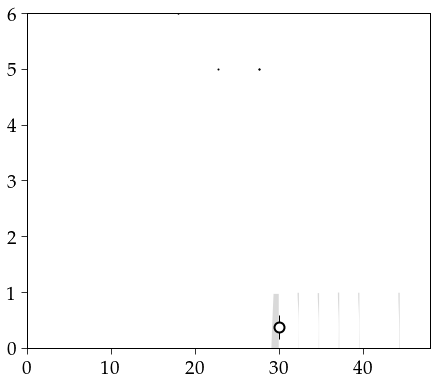

In [27]:
plt.figure(figsize=(8, 6))
QuickSlicePlot(qs.dt_accanswer_hour, qs.FavoriteCount, qs.FavoriteCount, zbins=1, xRange=[0, 48], xbins=20,
               yrange=[0, 5], draw="amvs", axes=plt.gca())
plt.xlim(0, 48)
plt.ylim(0, 6)

In [1]:
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/lib/python2.7/site-packages/keras/datasets/imdb.py:45: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


17473536/17464789 [==============================] - 5s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


/usr/lib/python2.7/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
25000/25000 [==============================] - 303s 12ms/step - loss: 0.4653 - acc: 0.7798
Epoch 2/3
25000/25000 [==============================] - 298s 12ms/step - loss: 0.3041 - acc: 0.8757
Epoch 3/3
25000/25000 [==============================] - 298s 12ms/step - loss: 0.2321 - acc: 0.9107
Accuracy: 87.52%
